# E-7 인물사진을 만들기

한국에서는 배경을 흐리게 하는 기술을 주로 '아웃포커싱'   
얕은 피사계 심도(shallow depth of field)   
셸로우 포커스(shallow focus)  
보케(bokeh)

이미지 세그멘테이션(image segmentation) 기술을 이용하여 하나의 이미지에서 배경과 사람을 분리,  
분리된 배경을 블러(blur) 처리 후 사람 이미지와 다시 합하여 아웃포커싱 효과를 적용한 인물 사진을 얻는다

1.배경이 있는 셀카를 촬영합니다. (배경과 사람의 거리가 약간 멀리 있으면 좋습니다.)   
2.시맨틱 세그멘테이션(Semantic segmentation)으로 피사체(사람)와 배경을 분리합니다.   
3.블러링(blurring) 기술로 배경을 흐리게 합니다.   
4.피사체를 배경의 원래 위치에 합성합니다.  

# step1-1 인물모드 직접 해 보기

In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt
import tensorflow as tf

(300, 300, 3)
(300, 300, 3)
(300, 300, 3)


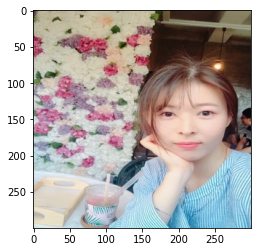

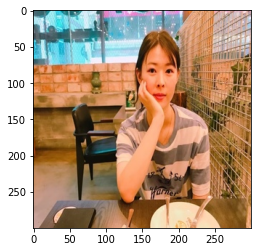

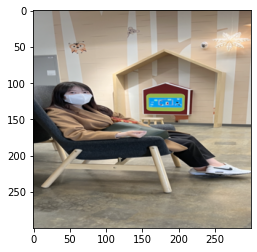

In [2]:
img6_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/image6.png'
img7_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/image7.png'
img8_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/image8.png'

img6_orig = cv2.imread(img6_path)
img7_orig = cv2.imread(img7_path)
img8_orig = cv2.imread(img8_path)

print(img6_orig.shape)
print(img7_orig.shape)
print(img8_orig.shape)

plt.imshow(cv2.cvtColor(img6_orig, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img7_orig, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img8_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
# 저장할 파일 이름을 결정합니다
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f06ca0456d0>)

In [4]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [5]:
segvalues6, output6 = model.segmentAsPascalvoc(img6_path)
segvalues7, output7 = model.segmentAsPascalvoc(img7_path)
segvalues8, output8 = model.segmentAsPascalvoc(img8_path)

In [6]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

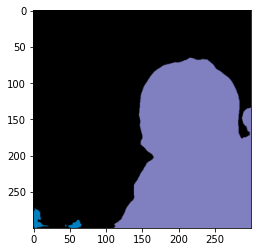

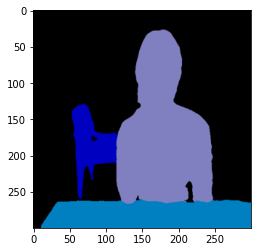

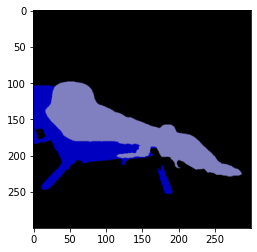

In [7]:
plt.imshow(output6)
plt.show()
plt.imshow(output7)
plt.show()
plt.imshow(output8)
plt.show()

In [8]:
segvalues6

{'class_ids': array([ 0, 11, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [False,  True,  True, ...,  True,  True,  True]])}

In [9]:
segvalues7

{'class_ids': array([ 0,  9, 11, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]])}

In [10]:
segvalues8

{'class_ids': array([ 0,  9, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [11]:
for class_id in segvalues6['class_ids']:
    print(LABEL_NAMES[class_id])

background
diningtable
person


In [12]:
for class_id in segvalues7['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
diningtable
person


In [13]:
for class_id in segvalues8['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
person


In [14]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [15]:
colormap[15]

array([192, 128, 128])

In [16]:
seg_color = (128,128,192)

(300, 300)


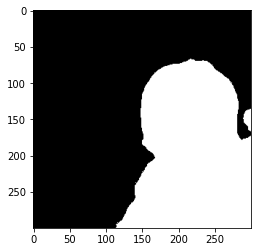

(300, 300)


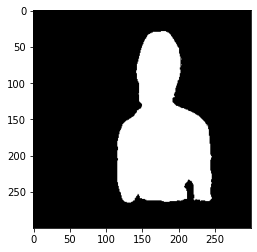

(300, 300)


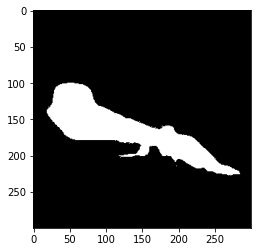

In [17]:
seg6_map = np.all(output6==seg_color, axis=-1)
print(seg6_map.shape)
plt.imshow(seg6_map, cmap='gray')
plt.show()

seg7_map = np.all(output7==seg_color, axis=-1)
print(seg7_map.shape)
plt.imshow(seg7_map, cmap='gray')
plt.show()

seg8_map = np.all(output8==seg_color, axis=-1)
print(seg8_map.shape)
plt.imshow(seg8_map, cmap='gray')
plt.show()

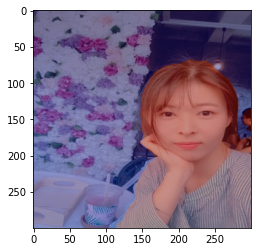

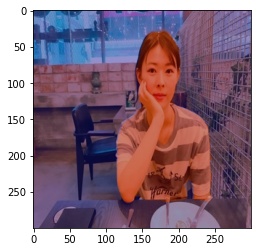

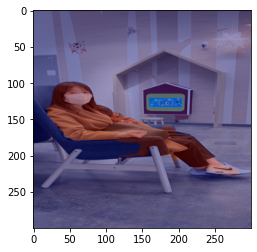

In [18]:
img6_show = img6_orig.copy()
img7_show = img7_orig.copy()
img8_show = img8_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img6_mask = seg6_map.astype(np.uint8) * 255
img7_mask = seg7_map.astype(np.uint8) * 255
img8_mask = seg8_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color6_mask = cv2.applyColorMap(img6_mask, cv2.COLORMAP_JET)
color7_mask = cv2.applyColorMap(img7_mask, cv2.COLORMAP_JET)
color8_mask = cv2.applyColorMap(img8_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img6_show = cv2.addWeighted(img6_show, 0.6, color6_mask, 0.4, 0.0)
img7_show = cv2.addWeighted(img7_show, 0.6, color7_mask, 0.4, 0.0)
img8_show = cv2.addWeighted(img8_show, 0.6, color8_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img6_show, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img7_show, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img8_show, cv2.COLOR_BGR2RGB))
plt.show()

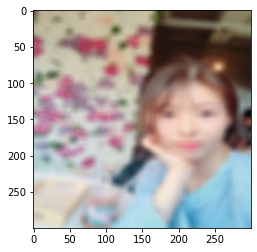

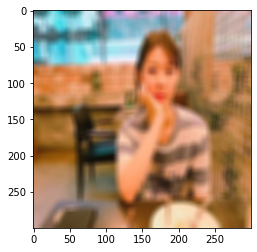

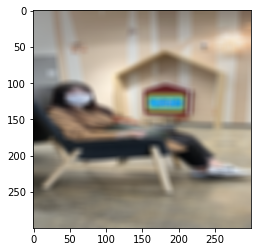

In [46]:
img6_orig_blur = cv2.blur(img6_orig, (10,10))  
plt.imshow(cv2.cvtColor(img6_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()
img7_orig_blur = cv2.blur(img7_orig, (10,10))  
plt.imshow(cv2.cvtColor(img7_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()
img8_orig_blur = cv2.blur(img8_orig, (10,10))  
plt.imshow(cv2.cvtColor(img8_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

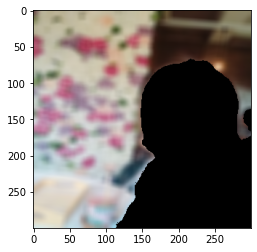

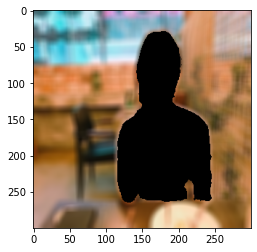

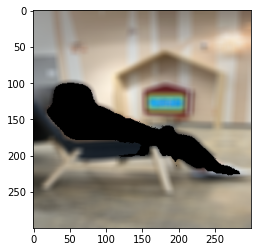

In [47]:
img6_mask_color = cv2.cvtColor(img6_mask, cv2.COLOR_GRAY2BGR)
img6_bg_mask = cv2.bitwise_not(img6_mask_color)
img6_bg_blur = cv2.bitwise_and(img6_orig_blur, img6_bg_mask)
plt.imshow(cv2.cvtColor(img6_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

img7_mask_color = cv2.cvtColor(img7_mask, cv2.COLOR_GRAY2BGR)
img7_bg_mask = cv2.bitwise_not(img7_mask_color)
img7_bg_blur = cv2.bitwise_and(img7_orig_blur, img7_bg_mask)
plt.imshow(cv2.cvtColor(img7_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

img8_mask_color = cv2.cvtColor(img8_mask, cv2.COLOR_GRAY2BGR)
img8_bg_mask = cv2.bitwise_not(img8_mask_color)
img8_bg_blur = cv2.bitwise_and(img8_orig_blur, img8_bg_mask)
plt.imshow(cv2.cvtColor(img8_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

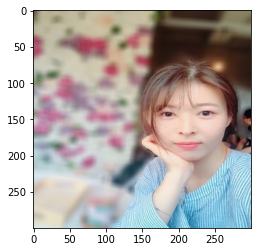

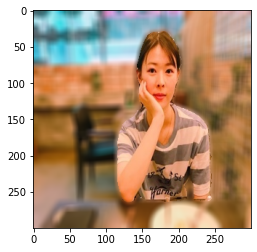

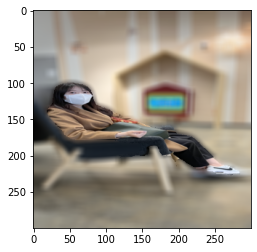

In [48]:
img6_concat = np.where(img6_mask_color==255, img6_orig, img6_bg_blur)
plt.imshow(cv2.cvtColor(img6_concat, cv2.COLOR_BGR2RGB))
plt.show()

img7_concat = np.where(img7_mask_color==255, img7_orig, img7_bg_blur)
plt.imshow(cv2.cvtColor(img7_concat, cv2.COLOR_BGR2RGB))
plt.show()

img8_concat = np.where(img8_mask_color==255, img8_orig, img8_bg_blur)
plt.imshow(cv2.cvtColor(img8_concat, cv2.COLOR_BGR2RGB))
plt.show()

# step1-2 강아지 사진 해보기

(300, 300, 3)
(300, 300, 3)
(300, 300, 3)


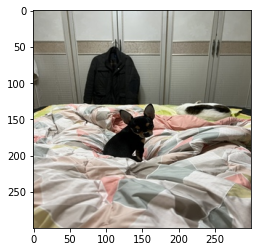

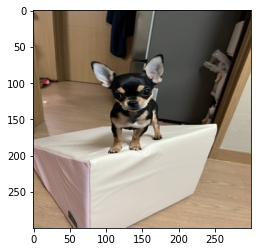

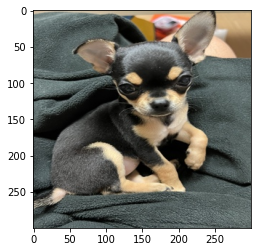

In [49]:
img9_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/image9.png'
img10_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/image10.png'
img11_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/image11.png'

img9_orig = cv2.imread(img9_path)
img10_orig = cv2.imread(img10_path)
img11_orig = cv2.imread(img11_path)

print(img9_orig.shape)
print(img10_orig.shape)
print(img11_orig.shape)

plt.imshow(cv2.cvtColor(img9_orig, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img10_orig, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img11_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [50]:
# 저장할 파일 이름을 결정합니다
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f06c9d71ac0>)

In [51]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [52]:
segvalues9, output9 = model.segmentAsPascalvoc(img9_path)
segvalues10, output10 = model.segmentAsPascalvoc(img10_path)
segvalues11, output11 = model.segmentAsPascalvoc(img11_path)

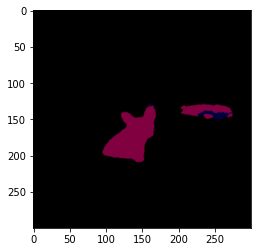

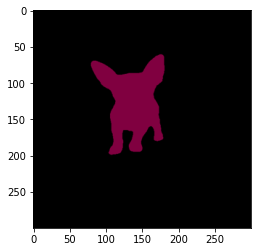

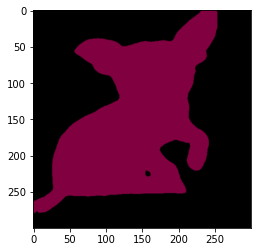

In [53]:
plt.imshow(output9)
plt.show()
plt.imshow(output10)
plt.show()
plt.imshow(output11)
plt.show()

In [54]:
segvalues9

{'class_ids': array([ 0,  8, 12]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [55]:
segvalues10

{'class_ids': array([ 0, 12]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [56]:
segvalues11

{'class_ids': array([ 0, 12]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [57]:
for class_id in segvalues9['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat
dog


In [58]:
for class_id in segvalues10['class_ids']:
    print(LABEL_NAMES[class_id])

background
dog


In [59]:
for class_id in segvalues11['class_ids']:
    print(LABEL_NAMES[class_id])

background
dog


In [60]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

In [61]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [62]:
colormap[12]

array([ 64,   0, 128])

In [63]:
seg_color = (128,0,64)

(300, 300)


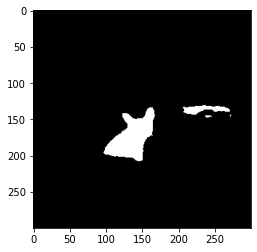

(300, 300)


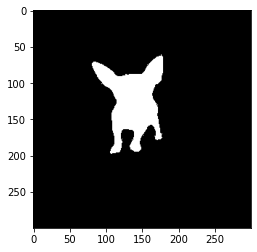

(300, 300)


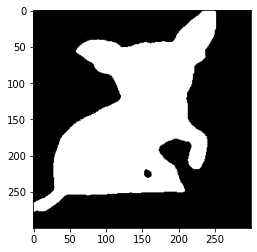

In [64]:
seg9_map = np.all(output9==seg_color, axis=-1)
print(seg9_map.shape)
plt.imshow(seg9_map, cmap='gray')
plt.show()

seg10_map = np.all(output10==seg_color, axis=-1)
print(seg10_map.shape)
plt.imshow(seg10_map, cmap='gray')
plt.show()

seg11_map = np.all(output11==seg_color, axis=-1)
print(seg11_map.shape)
plt.imshow(seg11_map, cmap='gray')
plt.show()

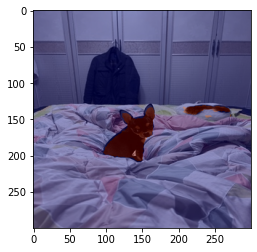

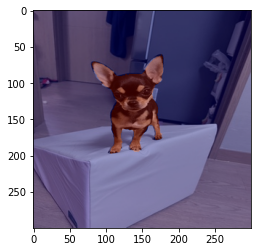

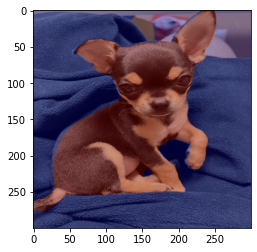

In [65]:
img9_show = img9_orig.copy()
img10_show = img10_orig.copy()
img11_show = img11_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img9_mask = seg9_map.astype(np.uint8) * 255
img10_mask = seg10_map.astype(np.uint8) * 255
img11_mask = seg11_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color9_mask = cv2.applyColorMap(img9_mask, cv2.COLORMAP_JET)
color10_mask = cv2.applyColorMap(img10_mask, cv2.COLORMAP_JET)
color11_mask = cv2.applyColorMap(img11_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img9_show = cv2.addWeighted(img9_show, 0.6, color9_mask, 0.4, 0.0)
img10_show = cv2.addWeighted(img10_show, 0.6, color10_mask, 0.4, 0.0)
img11_show = cv2.addWeighted(img11_show, 0.6, color11_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img9_show, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img10_show, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img11_show, cv2.COLOR_BGR2RGB))
plt.show()

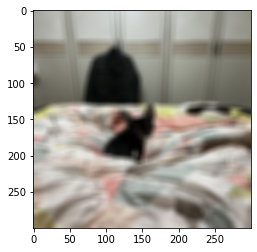

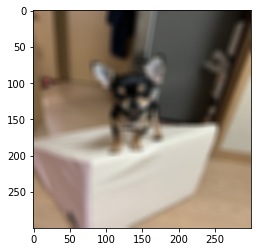

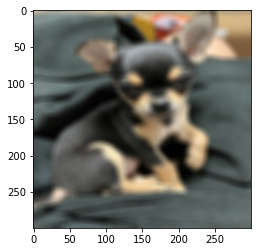

In [66]:
img9_orig_blur = cv2.blur(img9_orig, (10,10))  
plt.imshow(cv2.cvtColor(img9_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()
img10_orig_blur = cv2.blur(img10_orig, (10,10))  
plt.imshow(cv2.cvtColor(img10_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()
img11_orig_blur = cv2.blur(img11_orig, (10,10))  
plt.imshow(cv2.cvtColor(img11_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

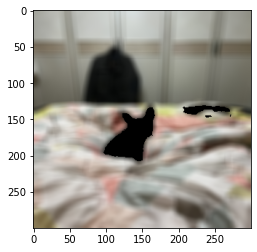

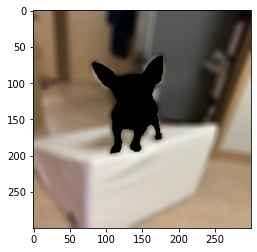

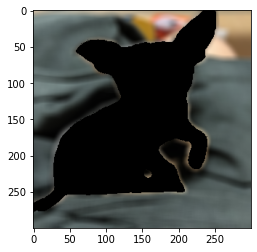

In [67]:
img9_mask_color = cv2.cvtColor(img9_mask, cv2.COLOR_GRAY2BGR)
img9_bg_mask = cv2.bitwise_not(img9_mask_color)
img9_bg_blur = cv2.bitwise_and(img9_orig_blur, img9_bg_mask)
plt.imshow(cv2.cvtColor(img9_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

img10_mask_color = cv2.cvtColor(img10_mask, cv2.COLOR_GRAY2BGR)
img10_bg_mask = cv2.bitwise_not(img10_mask_color)
img10_bg_blur = cv2.bitwise_and(img10_orig_blur, img10_bg_mask)
plt.imshow(cv2.cvtColor(img10_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

img11_mask_color = cv2.cvtColor(img11_mask, cv2.COLOR_GRAY2BGR)
img11_bg_mask = cv2.bitwise_not(img11_mask_color)
img11_bg_blur = cv2.bitwise_and(img11_orig_blur, img11_bg_mask)
plt.imshow(cv2.cvtColor(img11_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

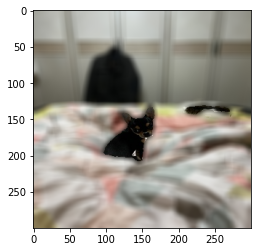

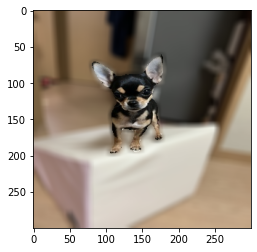

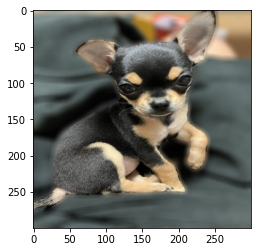

In [68]:
img9_concat = np.where(img9_mask_color==255, img9_orig, img9_bg_blur)
plt.imshow(cv2.cvtColor(img9_concat, cv2.COLOR_BGR2RGB))
plt.show()

img10_concat = np.where(img10_mask_color==255, img10_orig, img10_bg_blur)
plt.imshow(cv2.cvtColor(img10_concat, cv2.COLOR_BGR2RGB))
plt.show()

img11_concat = np.where(img11_mask_color==255, img11_orig, img11_bg_blur)
plt.imshow(cv2.cvtColor(img11_concat, cv2.COLOR_BGR2RGB))
plt.show()

# step1-3 크로마키 배경 합성 해보기

(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)


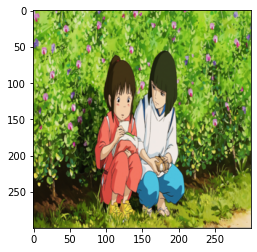

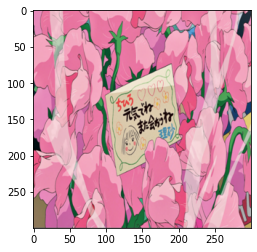

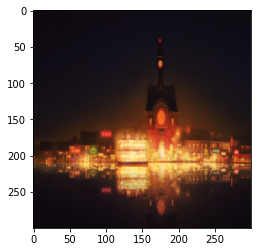

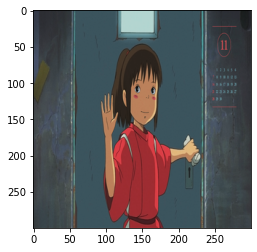

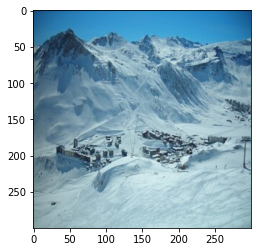

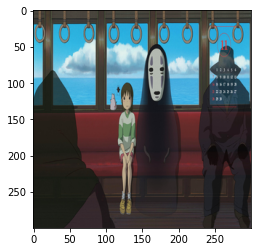

In [69]:
img12_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/images6.png'
img13_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/images7.png'
img14_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/images8.png'
img15_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/images9.png'
img16_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/images10.png'
img17_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/images11.png'

img12_orig = cv2.imread(img12_path)
img13_orig = cv2.imread(img13_path)
img14_orig = cv2.imread(img14_path)
img15_orig = cv2.imread(img15_path)
img16_orig = cv2.imread(img16_path)
img17_orig = cv2.imread(img17_path)

print(img12_orig.shape)
print(img13_orig.shape)
print(img14_orig.shape)
print(img15_orig.shape)
print(img16_orig.shape)
print(img17_orig.shape)

plt.imshow(cv2.cvtColor(img12_orig, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img13_orig, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img14_orig, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img15_orig, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img16_orig, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img17_orig, cv2.COLOR_BGR2RGB))
plt.show()

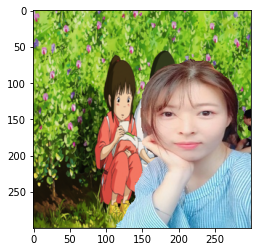

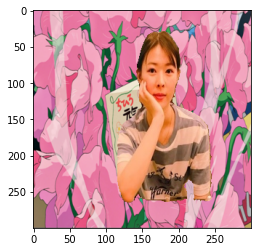

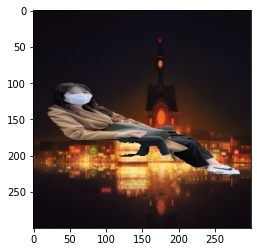

In [70]:
img12_concat = np.where(img6_mask_color==255, img6_orig, img12_orig)
plt.imshow(cv2.cvtColor(img12_concat, cv2.COLOR_BGR2RGB))
plt.show()

img13_concat = np.where(img7_mask_color==255, img7_orig, img13_orig)
plt.imshow(cv2.cvtColor(img13_concat, cv2.COLOR_BGR2RGB))
plt.show()

img14_concat = np.where(img8_mask_color==255, img8_orig, img14_orig)
plt.imshow(cv2.cvtColor(img14_concat, cv2.COLOR_BGR2RGB))
plt.show()

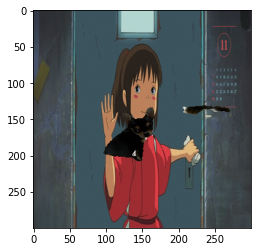

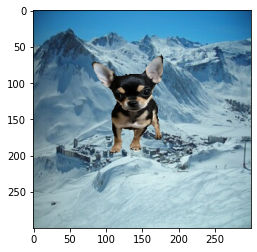

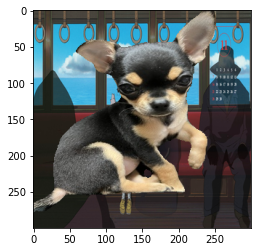

In [71]:
img15_concat = np.where(img9_mask_color==255, img9_orig, img15_orig)
plt.imshow(cv2.cvtColor(img15_concat, cv2.COLOR_BGR2RGB))
plt.show()

img16_concat = np.where(img10_mask_color==255, img10_orig, img16_orig)
plt.imshow(cv2.cvtColor(img16_concat, cv2.COLOR_BGR2RGB))
plt.show()

img17_concat = np.where(img11_mask_color==255, img11_orig, img17_orig)
plt.imshow(cv2.cvtColor(img17_concat, cv2.COLOR_BGR2RGB))
plt.show()

# step2 사진에서 문제점 찾기

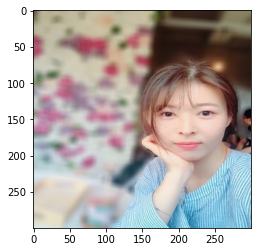
<cent>경계선이 매끄럽지 않고 너무 뚜렸하게 나옴</cent>

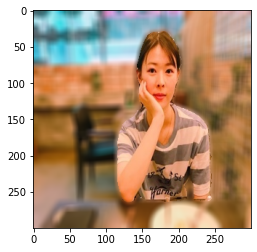
<cent>경계선이 매끄럽지 않고 너무 뚜렸하게 나옴</cent>

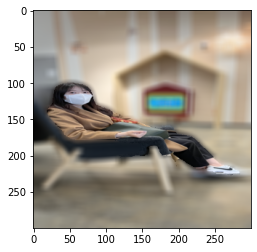
<cent>의자부분과의 경계가 불확실하고 부자연스러움</cent>

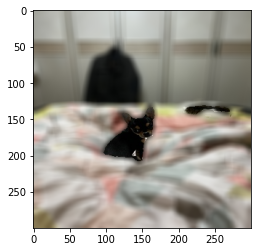
<cent>고양이 등의 검은부분을 개로 인식</cent>

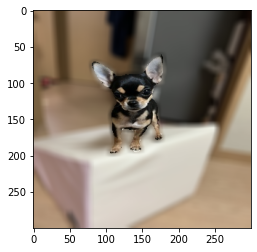
<cent>경계가 부자연스러움</cent>

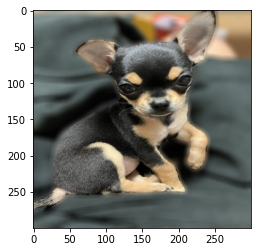
<cent>경계가 부자연스러움</cent>

# step3 해결 방법 제안해보기

해결방안

1.배경임에도 블러 처리가 되지 않는 경우  
ToF (Time Of Flight) 방식 사용  
ToF 는 Time Of flight 로 비행시간, 즉 빛을 쏘아서 반사되어 오는 시간을 측정하여 거리를 계산하는 방식이다.  
ToF 방식을 사용하여 각 픽셀이 피사체까지의 거리를 결정할 수 있는 픽셀 배열로 구성하여 거리(depth) 이미지를 얻을 수 있다.   
이를 바탕으로 정확한 Image Segmentation 이 가능 할 것이다,

2.경계선이 뚜렸하여 부자연스러운 부분  
피사체 이미지의 가장자리 부분을 Gaussian Blur 처리 Segmentation 로 검출된 피사체 이미지의 가장자리에   
가우시안 분포를 갖는 커널로 블러링 하는 가우시안 블러링(Gaussian Blur) 처리를 해주어   
경계선을 자연스럽게 할 수 있다.

# 회고

포커스 기능을 직접 코딩으로 비슷하게 구현해 보게 되는 재미있는 과제였다.  
하지만 막상 시중에 보는 어플과 같은 매끄럽고 자연스러운 기능까지는 완벽히 구현이 되지 않아 아쉬웠다.  
다음번엔 구글 pixel4를 이용하여 포커스 기능을 활용하는 방법을 해 보고 싶다.  

참고: 이재준 퍼실님 깃허브 참고.